# Data Processing

In [1]:
import sys
sys.path.insert(0, '../src')

In [2]:
from config import *
from data.data_utils import *
from IPython.display import HTML

In [3]:
preprocess_raw_data(sample=100000)

Preprocessed data found. Skipping...


In [4]:
remove_unusable_data()

Cleansed data found. Skipping...


In [5]:
from data.dataset import ASL_DATASET, label_dict_inference, label_dict

In [6]:
dataset = ASL_DATASET(augment=True)
dataset

ASL_DATASET(Participants: 21, Length: 72758

In [7]:
from visualizations import visualize_target_sign

Generating ..
 Frame : 32: .................................

.

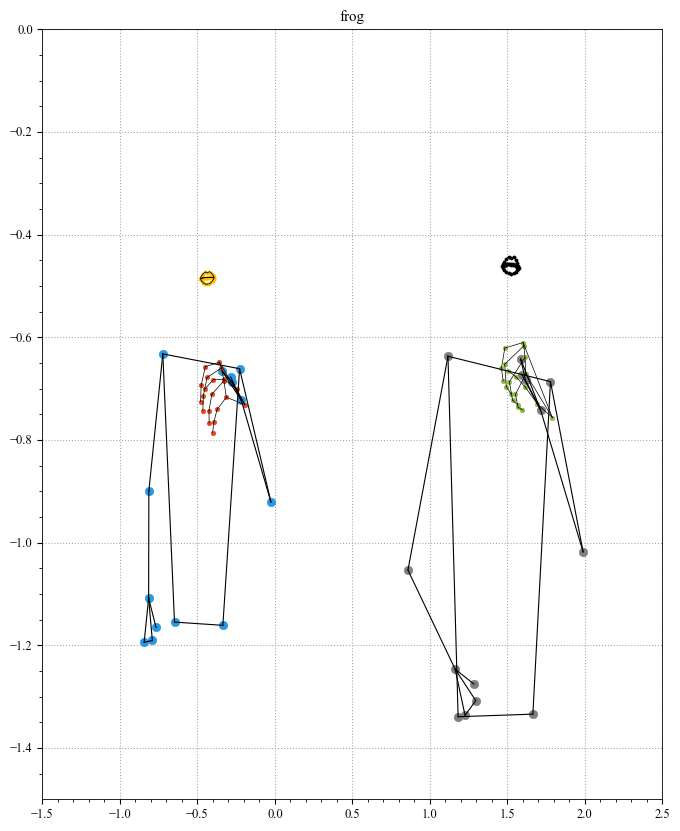

In [13]:
target_sign = 90
anim = visualize_target_sign(dataset,target_sign,n_samples=2)
HTML(anim.to_jshtml())

In [9]:
from dl_utils import *

In [10]:
dataloader = get_dataloader(dataset, batch_size=128, shuffle=True, dl_framework='TENSORFLOW')
type(dataloader)

torch.utils.data.dataloader.DataLoader

In [11]:
for X,y in dataloader:
    print(y)
    break

tensor([ 19,  87,  13, 114,  78,  50, 103, 122,  12, 118, 118, 172,  14, 214,
        188, 155,  27, 223,  58, 120, 233,  72, 104,  54, 176, 200,  59,  45,
         33, 168,  44,  18,  80,  73, 223,   9, 249, 205,  19, 129,  47,  49,
        201,  70,  51, 196,  39,  85, 245,  47,  31, 171,   7,  85, 194, 169,
        246, 223,  13, 103, 121, 182, 217,  67, 155,  92, 122, 248, 188, 212,
        219,  55,  23,  98,  33,  55,  17,  24,  43, 188,  33,  43,  53, 163,
         66, 132, 148,  37, 184, 232,  66, 101, 161, 144, 177,  58, 131, 139,
         96,  54,  72,  84, 119, 151, 164,  76, 158, 166, 182,  67,  68, 164,
         11,  70,  91,  96, 178,  43, 217,  54, 133,  73,  78,  72,  74,   1,
         66,  24])


In [8]:
(BATCH_SIZE, INPUT_SIZE ,N_LANDMARKS, N_DIMS)

(128, 32, 96, 2)

In [9]:
from src.models.tf_models import Very_simple_model 

model = Very_simple_model((BATCH_SIZE, N_LANDMARKS, N_DIMS))
model

In [10]:
model.compile(loss="SparseCategoricalCrossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics="accuracy")

In [11]:
model(X)

<tf.Tensor: shape=(128, 250), dtype=float32, numpy=
array([[0.00677454, 0.00105678, 0.00192146, ..., 0.00356128, 0.00044186,
        0.00667572],
       [0.0097817 , 0.00159979, 0.00229597, ..., 0.00300301, 0.00052369,
        0.00681855],
       [0.00942622, 0.00263584, 0.00237037, ..., 0.0043106 , 0.00111976,
        0.00484115],
       ...,
       [0.00938991, 0.00122264, 0.00170089, ..., 0.00386731, 0.00046109,
        0.00674574],
       [0.01188719, 0.00167492, 0.00229503, ..., 0.00400796, 0.00113182,
        0.00463266],
       [0.01130754, 0.00206411, 0.00244784, ..., 0.0036462 , 0.00104374,
        0.00444863]], dtype=float32)>

In [13]:
y.shape

TensorShape([128, 1])